# Bayesian Regression - Incomplete

In [31]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az

In [39]:
df = pd.read_csv("../data/SalesData.csv")

X = df[['AverageTemperature','TotalInventory']].values
y = df['TotalSales'].values

In [40]:
with pm.Model() as model:
    #Priors for the parameters
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=2)  #Two predictors

    #Model prediction of the mean
    mu = alpha + pm.math.dot(beta, X.T)

    #Likelihood (sampling distribution) of observations
    likelihood = pm.Normal('y', mu=mu, sigma=1, observed=y)

    #Inference using Markov Chain Monte Carlo (MCMC)
    trace = pm.sample(1000, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta]


/Users/robertwrobel/anaconda3/envs/base2/lib/python3.11/site-packages/rich/live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


In [41]:
#Posterior summary statistics
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,16.113,0.426,15.273,16.854,0.01,0.007,1788.0,1729.0,1.01
beta[0],0.166,0.005,0.156,0.176,0.00,0.000,2183.0,1811.0,1.00
beta[1],0.644,0.003,0.639,0.648,0.00,0.000,2009.0,1495.0,1.00


array([<Axes: title={'center': 'alpha'}>,
       <Axes: title={'center': 'beta\n0'}>,
       <Axes: title={'center': 'beta\n1'}>], dtype=object)

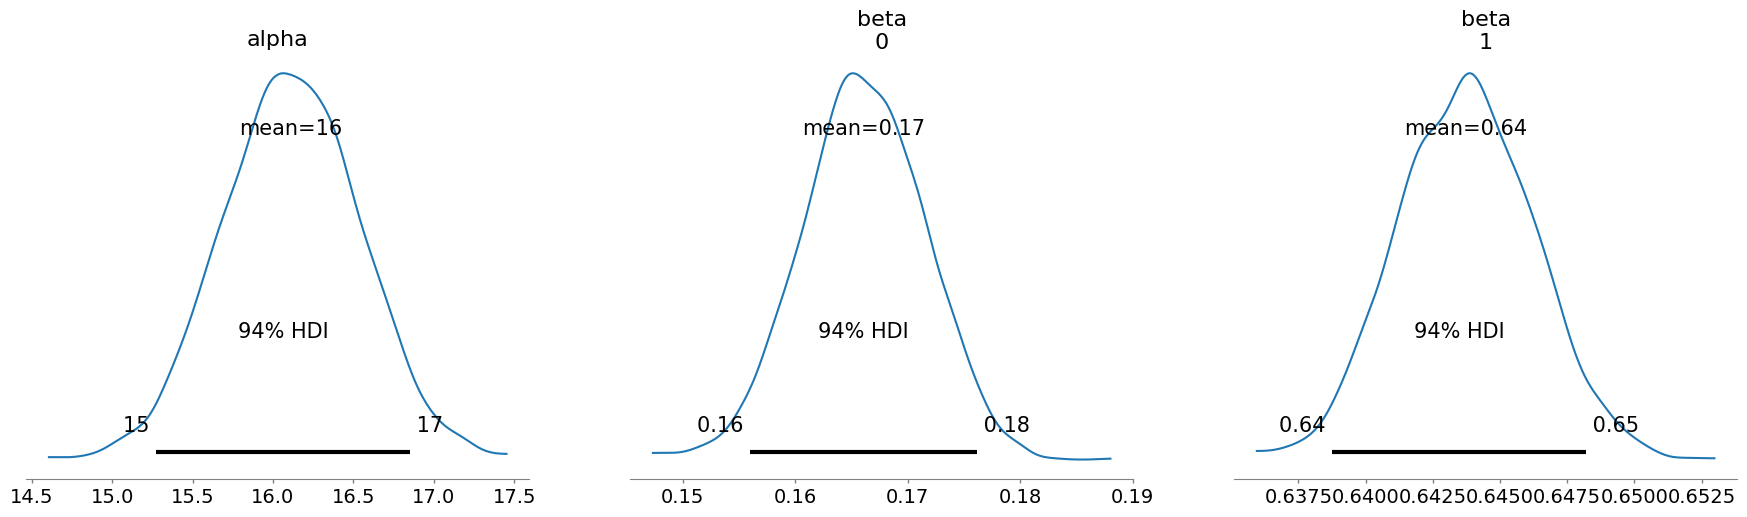

In [42]:
#Posterior 
pm.plot_posterior(trace)

array([[<Axes: title={'center': 'alpha'}>,
        <Axes: title={'center': 'alpha'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>]], dtype=object)

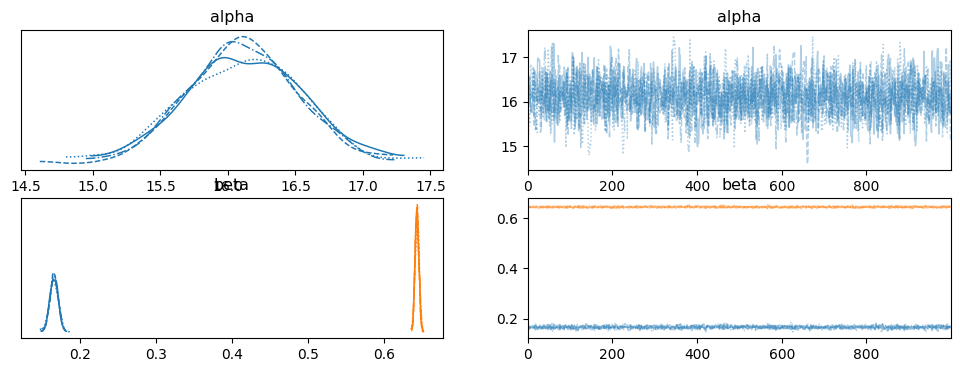

In [43]:
pm.plot_trace(trace)